# pysat demo using data from ACE SWEPAM

In [2]:
import datetime as dt
import matplotlib.pyplot as plt

import pysat
import pysatSpaceWeather

In [2]:
# Set data directory if user hasn't already set one
if len(pysat.params['data_dirs']) == 0:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '~/shared/pysatDemo'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

In [3]:
# Register instruments with pysat. Only needed once per install.
pysat.utils.registry.register_by_module(pysatSpaceWeather.instruments)

In [3]:
# Instantiate a pysat Instrument that will use support in 
# pysatSpaceWeather for ACE Space Weather data.
ace = pysat.Instrument('ace', 'swepam', tag='historic')

In [ ]:
# Learn about the ACE platform and SWEPAM instrument
help(ace.inst_module)

In [ ]:
# Learn about the ace pysat.Instrument object
print(ace)

In [5]:
# Download data for July, 2021
ace.download(dt.datetime(2021, 7, 1), dt.datetime(2021, 7, 31))

In [6]:
# Load all data
ace.load()

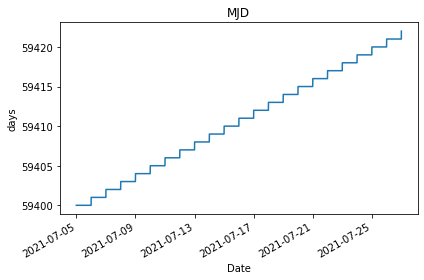

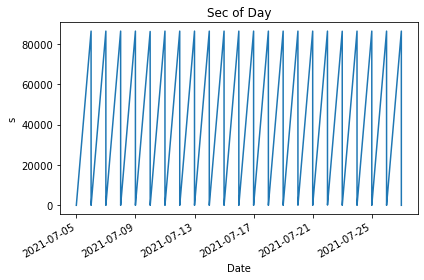

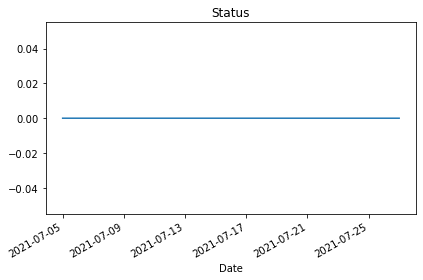

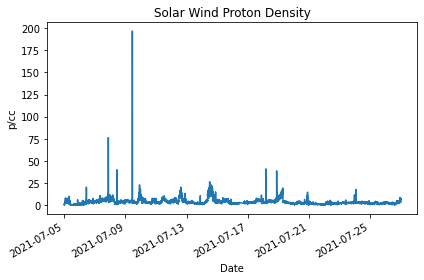

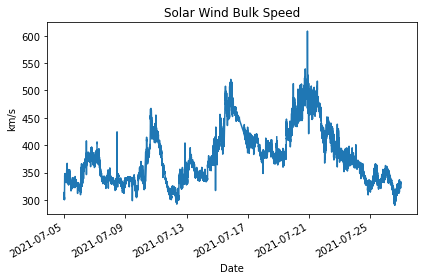

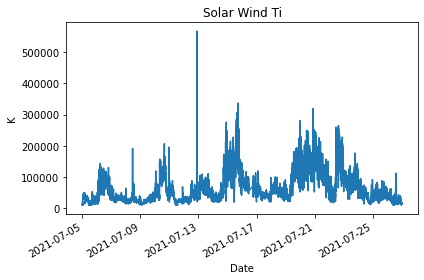

In [8]:
# Make plot of all variables in July, 2021
sdate = dt.datetime(2021, 7, 5)
edate = dt.datetime(2021, 7, 27)
for var in ace.variables:
    plt.figure()
    units = ace.meta[var, ace.meta.labels.units]
    title = ace.meta[var, ace.meta.labels.name]

    ace[sdate:edate, var].plot(title=title, ylabel=units, 
                               xlabel='Date')
    plt.tight_layout()
    plt.savefig(''.join([var, '_example.jpg']))
